In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/monitoramento_tempo.csv')

In [4]:
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [5]:
df.tail()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
45248,282.00,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,282.89,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,283.39,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,283.02,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00
45252,282.28,1029.0,76.0,340.0,1.0,Quarta,2017-11-30 00:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [4]:
import datetime
df['data'] = pd.to_datetime(df['data'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


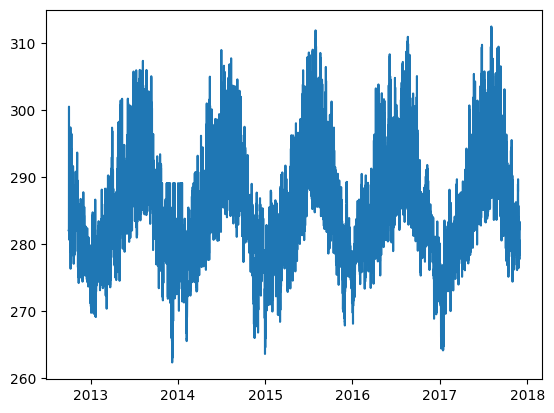

In [9]:
plt.plot(df['data'],df['temperatura'])

C:\Users\dsadm\AppData\Local\Temp\ipykernel_17484\2596087009.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  eixo.legend()


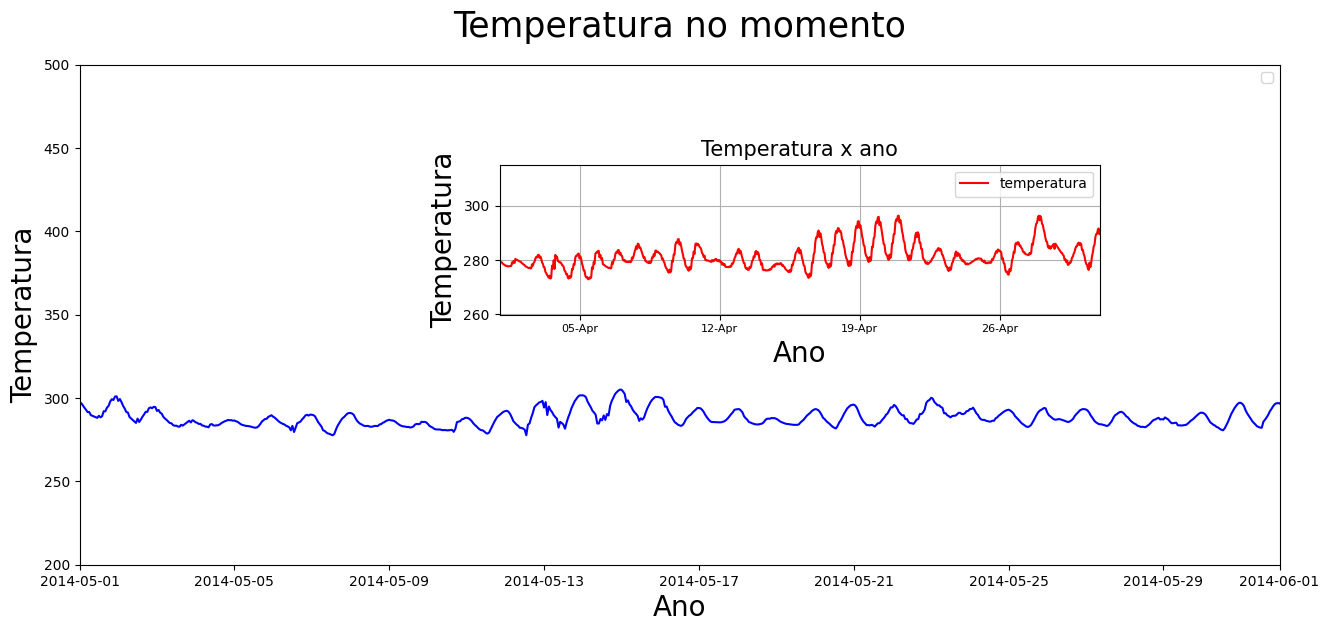

In [14]:
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0,0,1,1])
eixo.set_ylim(200,500)
eixo.plot(df['data'],df['temperatura'],color='b')

eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento', fontsize=25, pad=20)
eixo.set_xlabel('Ano', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend()

eixo2 = fig.add_axes([0.35,0.50,0.5,0.3])

eixo2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

eixo2.set_xlim(datetime.datetime(2015,4,1),datetime.datetime(2015,5,1))
eixo2.tick_params(axis='x',labelsize=8)
eixo2.plot(df['data'],df['temperatura'],color='r')
eixo2.grid(True)
eixo2.set_title('Temperatura x ano', fontsize=15)
eixo2.set_ylabel('Temperatura', fontsize=20)
eixo2.set_xlabel('Ano', fontsize=20)
eixo2.legend(['temperatura'],loc='best',fontsize=10)

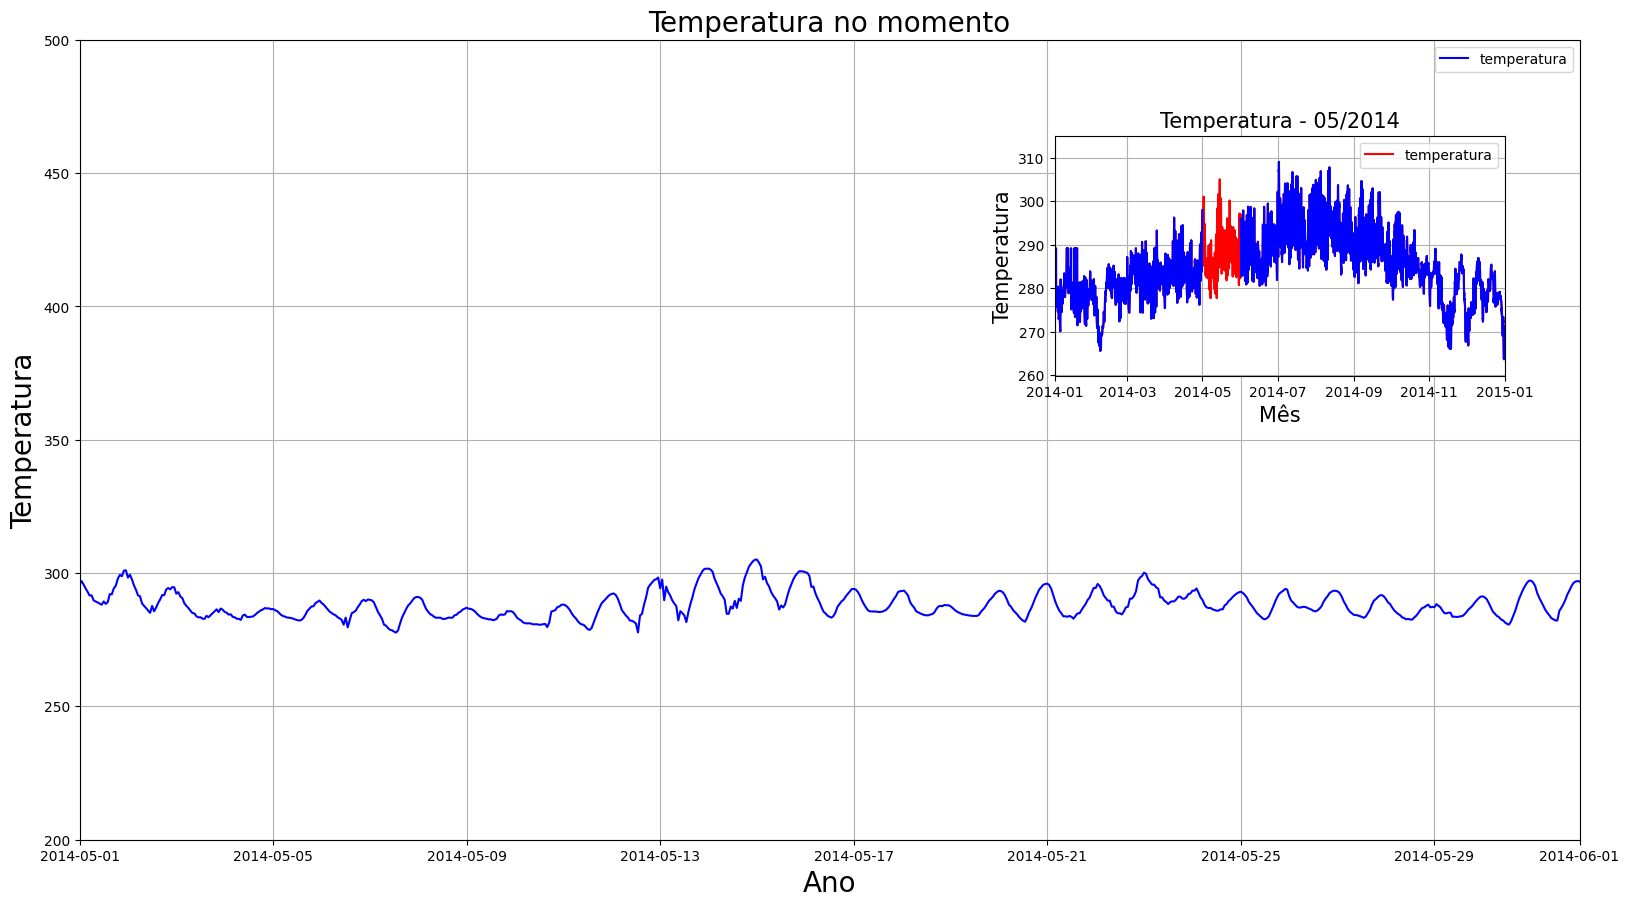

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.rcParams['font.size'] = '10'
eixo = fig.add_axes([0,0,1,1])
eixo.set_ylim(200,500)
eixo2 = fig.add_axes([0.65, 0.58, 0.3, 0.3])
eixo.plot(df['data'], df['temperatura'], color='b')
eixo.grid(True)

eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento', fontsize=20)
eixo.set_xlabel('Ano', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['temperatura'], loc='best')

azul_esquerda = df['data']<datetime.datetime(2014,5,1)
azul_direita = df['data']>datetime.datetime(2014,6,1)

eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo2.plot(df['data'], df['temperatura'], color='r')
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color='b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color='b')
eixo2.grid(True)
eixo2.set_title('Temperatura - 05/2014', fontsize=15)
eixo2.set_ylabel('Temperatura', fontsize=15)
eixo2.set_xlabel('Mês', fontsize=15)
eixo2.legend(['temperatura'], loc='best', fontsize=10)

Text(2013-02-19 21:00:00, 267.37, 'Mínimo')

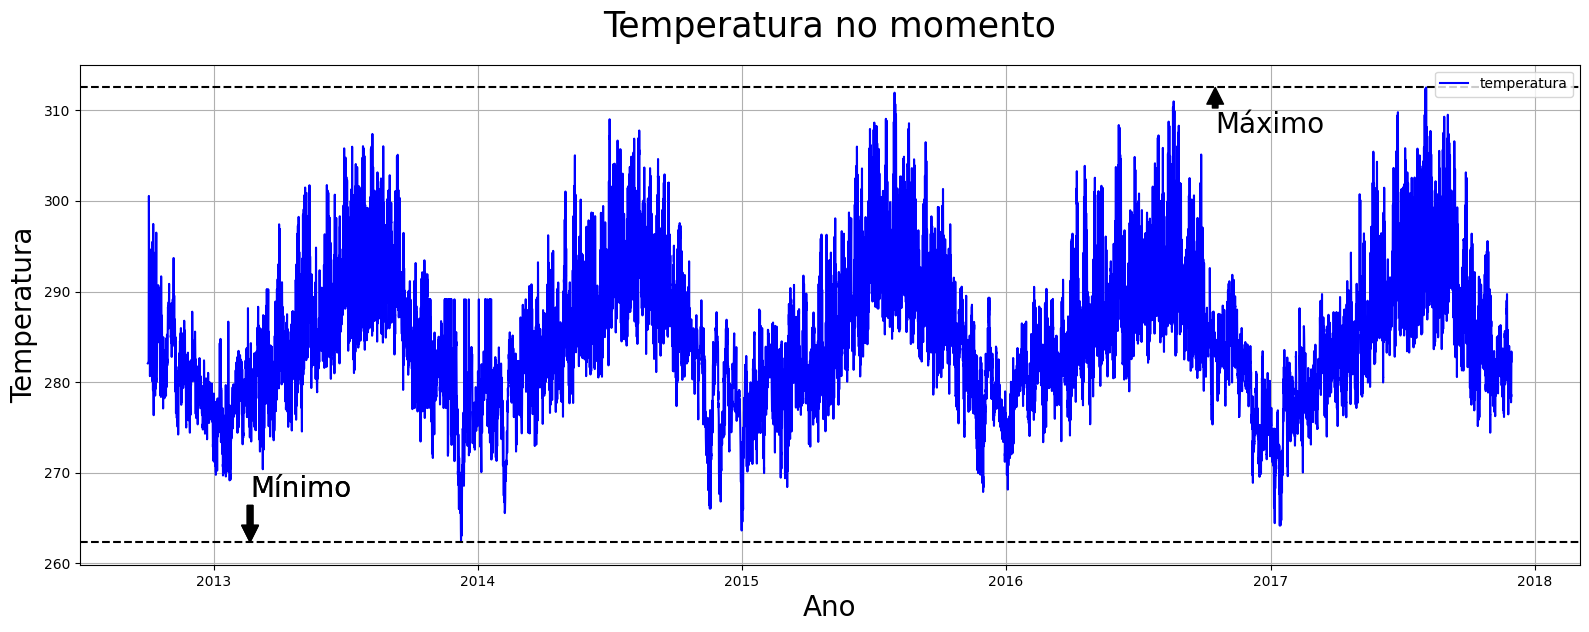

In [6]:
fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'],df['temperatura'],color='b')
eixo.grid(True)
eixo.set_title('Temperatura no momento',fontsize=25,pad=20)
eixo.set_ylabel('Temperatura',fontsize=20)
eixo.set_xlabel('Ano',fontsize=20)
eixo.legend(['temperatura'],loc='best')
# fazendo as maracações no gráfico
eixo.axhline(max(df['temperatura']),color='k',linestyle='--')
eixo.axhline(min(df['temperatura']),color='k',linestyle='--')

# armazenando valores em x1
x1 = df['data'][df['temperatura'].idxmax()] # armazena a posição em x1
y1 = max(df['temperatura']) # armazena em y1 o valor da temperatura
x2 = x1=df['data'][df['temperatura'].idxmax()-7000]
y2 = max(df['temperatura'])-5 # armazena a posição em y2

# função para fazer anotação no grafico
eixo.annotate('Máximo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

# anotação valor minimo
x1 = df['data'][df['temperatura'].idxmin()] # anota o valor minimo
y1 = min(df['temperatura']) # armazena o valor minimo de temperatura
x2= x1=df['data'][df['temperatura'].idxmin()-7000] 
y2 = min(df['temperatura'])+5 

eixo.annotate('Mínimo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

x1 = df['data'][df['temperatura'].idxmin()]
y1 = min(df['temperatura'])
x2 = x1 = df['data'][df['temperatura'].idxmin()-7000]
y2 = min(df['temperatura'])+5
eixo.annotate('Mínimo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

Text(0, 0.5, 'Temperatura média')

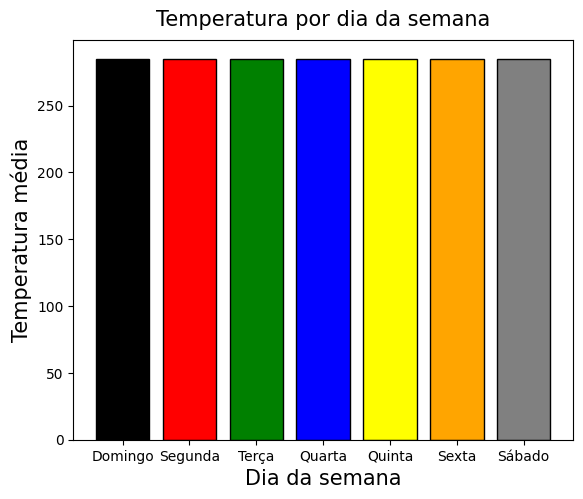

In [8]:
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'gray']
temperatura_dia_semana = df.groupby('dia_da_semana')['temperatura'].mean()
temperatura_dia_semana
nome_dia_semana = ['Domingo','Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_dia_semana = temperatura_dia_semana[nome_dia_semana]

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(temperatura_dia_semana))
eixo.bar(indice, temperatura_dia_semana, color=cores, edgecolor='black')
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dia_semana)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)

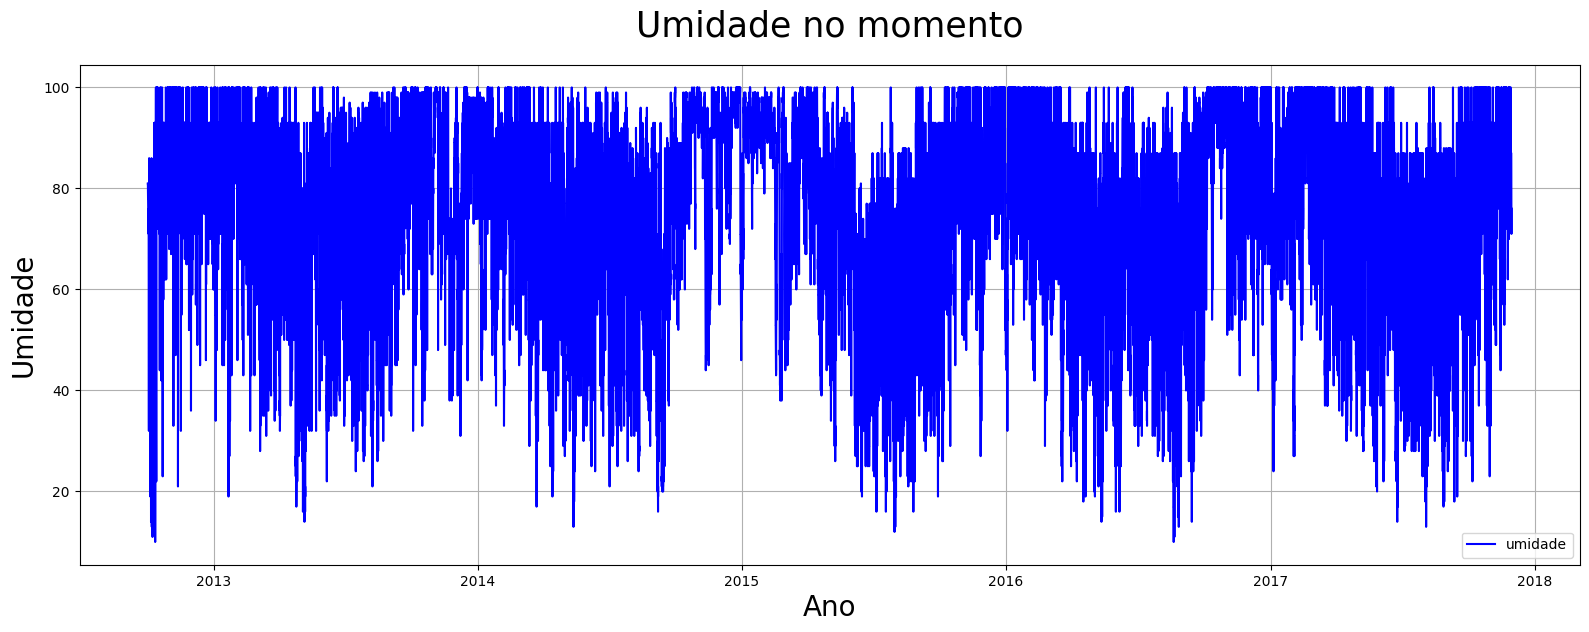

In [ ]:
# A e C)
fig = plt.figure(figsize=(15,5)) # Tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # Eixos do gráfico
eixo.plot(df['data'],df['humidade'],color='b') # Dados no gráfico
eixo.grid(True) # Vai ter grades
eixo.set_title('Umidade no momento',fontsize=25,pad=20) # Titulo do gráfico
eixo.set_ylabel('Umidade',fontsize=20) # legenda eixo Y
eixo.set_xlabel('Ano',fontsize=20) # legenda eixo X
eixo.legend(['umidade'],loc='best') # legenda dos dados

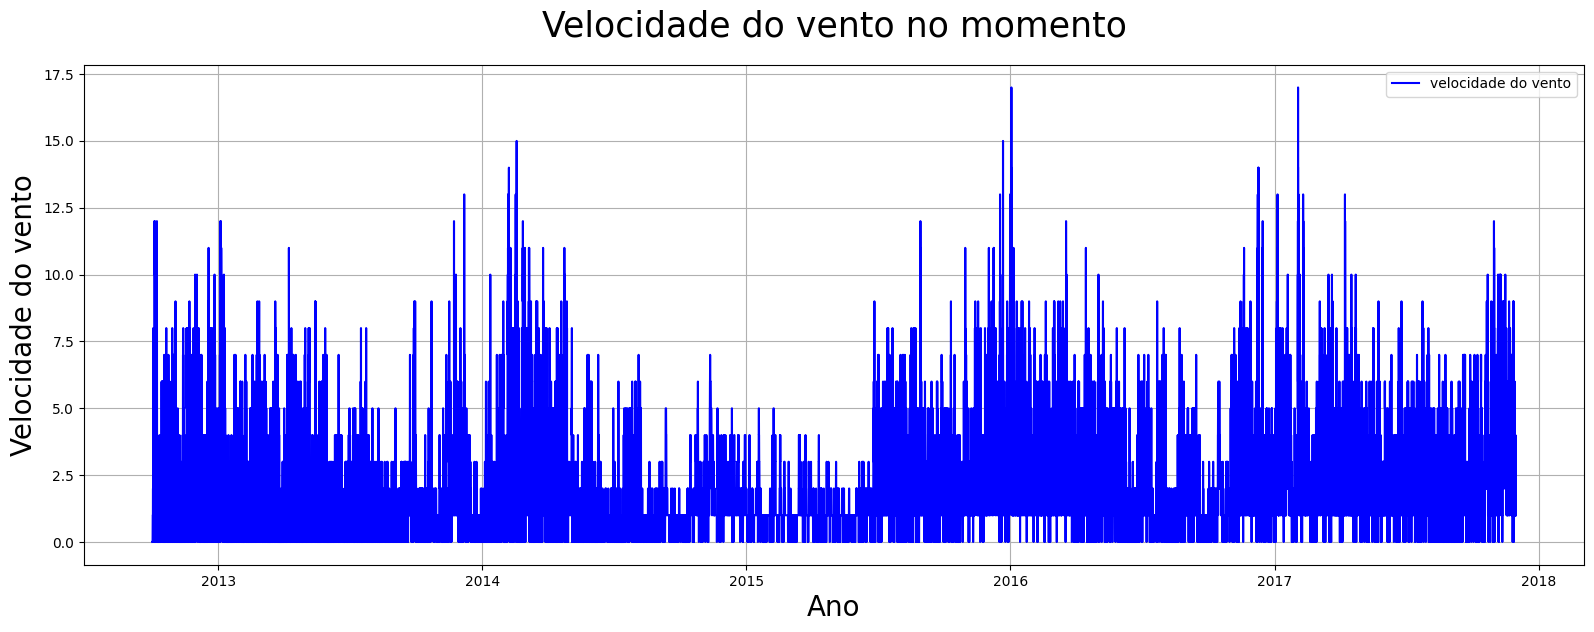

In [ ]:
# B)
fig = plt.figure(figsize=(15,5)) # Tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # Eixos do gráfico
eixo.plot(df['data'],df['velocidade do vento'],color='b') # Dados no gráfico
eixo.grid(True) # Vai ter grades
eixo.set_title('Velocidade do vento no momento',fontsize=25,pad=20) # Titulo do gráfico
eixo.set_ylabel('Velocidade do vento',fontsize=20) # legenda eixo Y
eixo.set_xlabel('Ano',fontsize=20) # legenda eixo X
eixo.legend(['velocidade do vento'],loc='best') # legenda dos dados

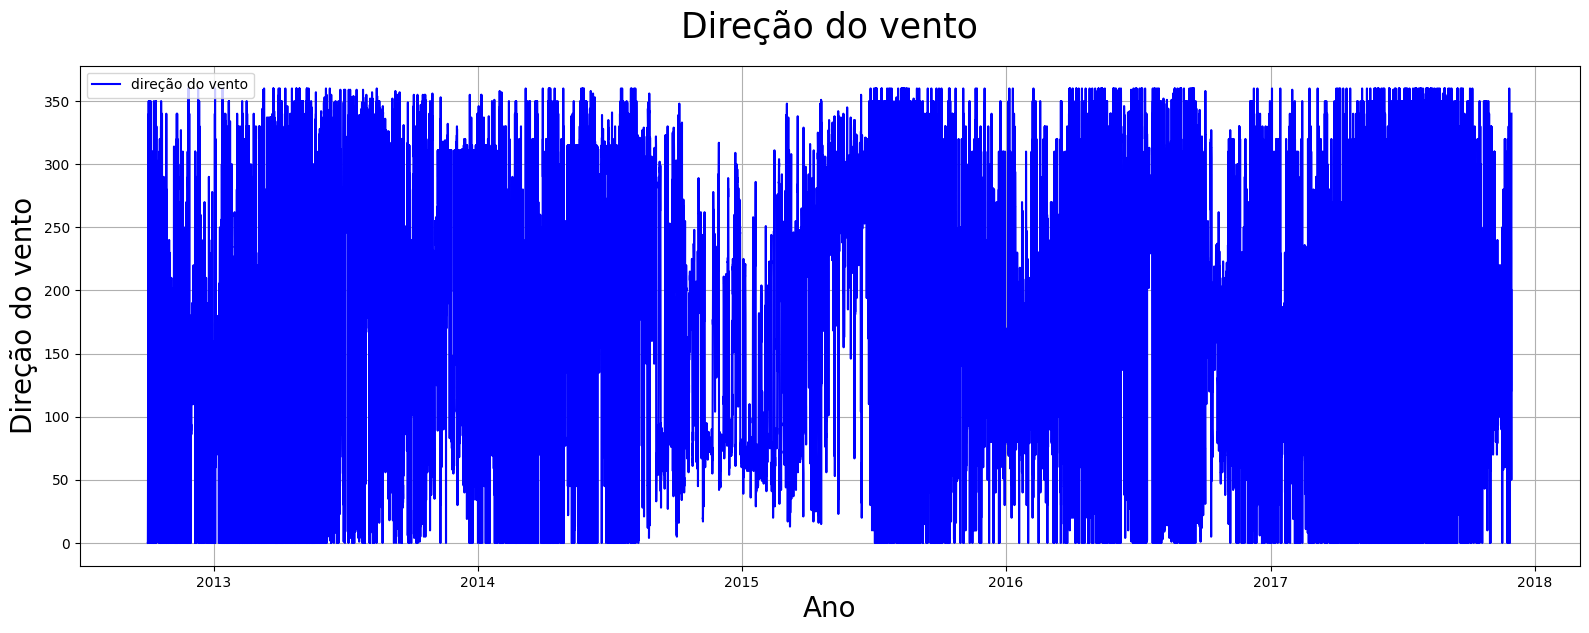

In [ ]:
# D)
fig = plt.figure(figsize=(15,5)) # Tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # Eixos do gráfico
eixo.plot(df['data'],df['direção do vento'],color='b') # Dados no gráfico
eixo.grid(True) # Vai ter grades
eixo.set_title('Direção do vento',fontsize=25,pad=20) # Titulo do gráfico
eixo.set_ylabel('Direção do vento',fontsize=20) # legenda eixo Y
eixo.set_xlabel('Ano',fontsize=20) # legenda eixo X
eixo.legend(['direção do vento'],loc='best') # legenda dos dados

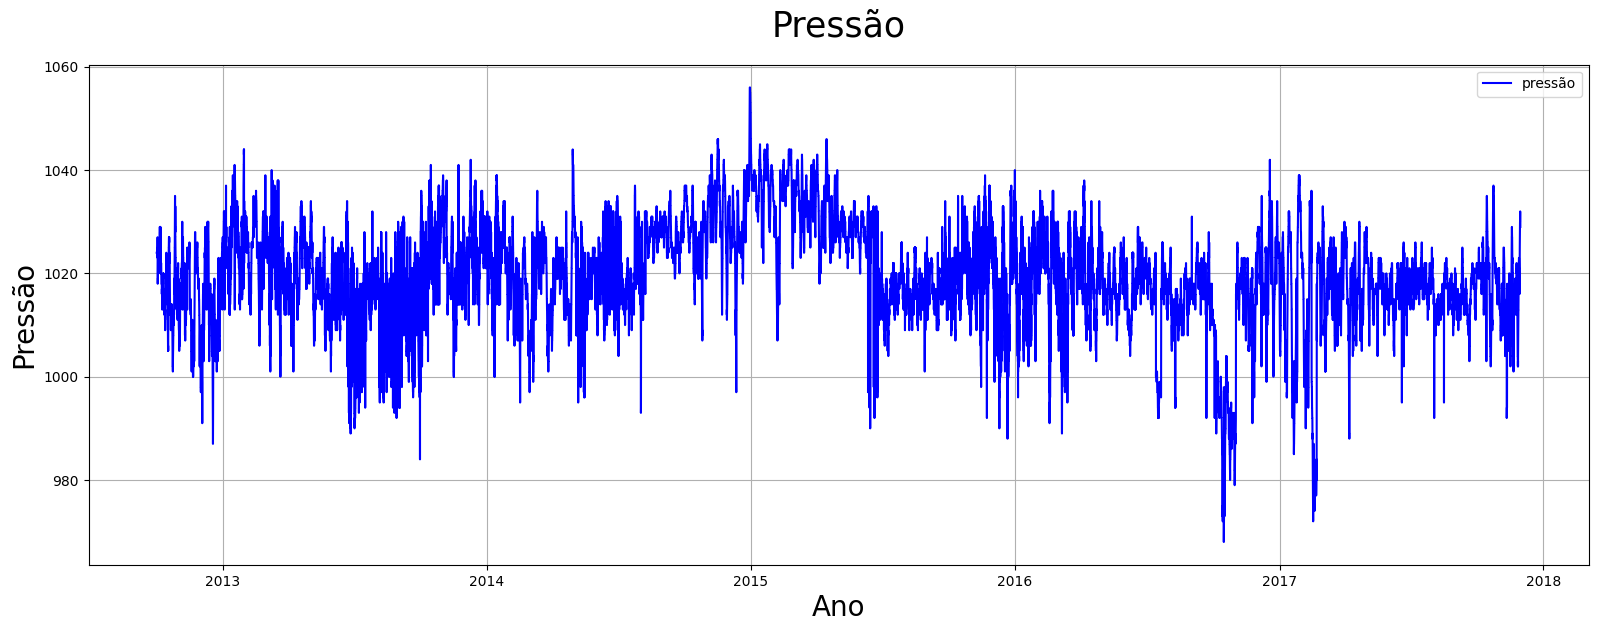

In [ ]:
# E)
fig = plt.figure(figsize=(15,5)) # Tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # Eixos do gráfico
eixo.plot(df['data'],df['pressão'],color='b') # Dados no gráfico
eixo.grid(True) # Vai ter grades
eixo.set_title('Pressão',fontsize=25,pad=20) # Titulo do gráfico
eixo.set_ylabel('Pressão',fontsize=20) # legenda eixo Y
eixo.set_xlabel('Ano',fontsize=20) # legenda eixo X
eixo.legend(['pressão'],loc='best') # legenda dos dados

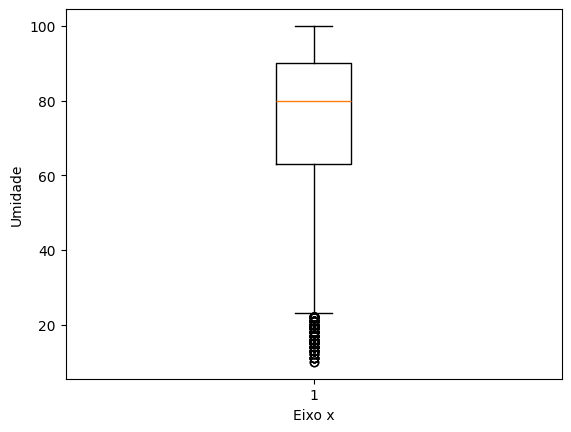

In [ ]:
# F)
plt.boxplot(df['humidade'])
plt.xlabel('Eixo x')
plt.ylabel('Umidade')
plt.show()

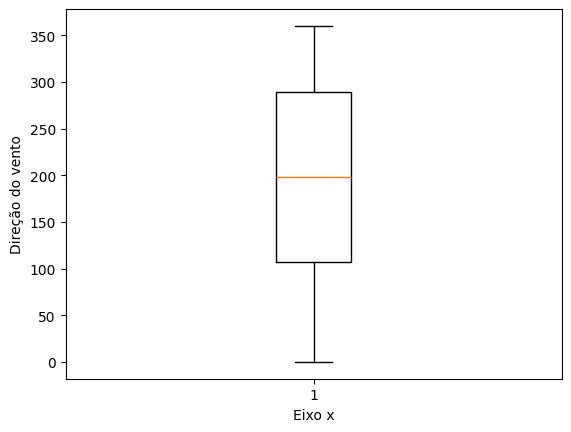

In [ ]:
# G)
plt.boxplot(df['direção do vento'])
plt.xlabel('Eixo x')
plt.ylabel('Direção do vento')
plt.show()

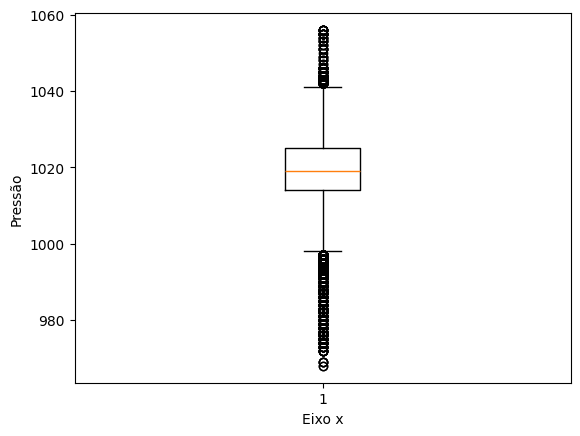

In [ ]:
# H)
plt.boxplot(df['pressão'])
plt.xlabel('Eixo x')
plt.ylabel('Pressão')
plt.show()